## Introduction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Descriptive Analysis

Let's first take a brief view of the dataset

In [190]:
df = pd.read_csv('kc_house_data.csv')
df.head().T

0                1                2  \
id                  7129300520       6414100192       5631500400   
date           20141013T000000  20141209T000000  20150225T000000   
price                 221900.0         538000.0         180000.0   
bedrooms                     3                3                2   
bathrooms                  1.0             2.25              1.0   
sqft_living               1180             2570              770   
sqft_lot                  5650             7242            10000   
floors                     1.0              2.0              1.0   
waterfront                   0                0                0   
view                         0                0                0   
condition                    3                3                3   
grade                        7                7                6   
sqft_above                1180             2170              770   
sqft_basement                0              400                0   
yr_built                  1955             1951             1933   
yr_renovated                 0             1991                0   
zipcode                  98178            98125            98028   
lat                    47.5112           47.721          47.7379   
long                  -122.257         -122.319         -122.233   
sqft_living15             1340             1690             2720   
sqft_lot15                5650             7639             8062   

                             3                4  
id                  2487200875       1954400510  
date           20141209T000000  20150218T000000  
price                 604000.0         510000.0  
bedrooms                     4                3  
bathrooms                  3.0              2.0  
sqft_living               1960             1680  
sqft_lot                  5000             8080  
floors                     1.0              1.0  
waterfront                   0                0  
view                         0                0  
condition                    5                3  
grade                        7                8  
sqft_above                1050             1680  
sqft_basement              910                0  
yr_built                  1965             1987  
yr_renovated                 0                0  
zipcode                  98136            98074  
lat                    47.5208          47.6168  
long                  -122.393         -122.045  
sqft_living15             1360             1800  
sqft_lot15                5000             7503

### Variable Discription
| Variable  |  Description |
| ------------ | ------------ |
| id | Identification  |
|date   |  Date sold |
| price  |  Sale price |
| bedrooms  | Number of bedrooms  |
| bathrooms  | Number of bathrooms  |
| sqft_liv  |  Size of living area in square feet |
| sqft_lot  | Size of the lot in square feet  |
| floors  | Number of floors  |
|  waterfront | ‘1’ if the property has a waterfront, ‘0’ if not.  |
| view  | An index from 0 to 4 of how good the view of the property was  |
| condition  |Condition of the house, ranked from 1 to 5   |
|  grade | Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: [KingCounty](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r "KingCounty")|
| sqft_above  | Square feet above ground  |
| sqft_basmt  | Square feet below ground  |
| yr_built  | Year built  |
| yr_renov  | Year renovated. ‘0’ if never renovated  |
| zipcode  | 5 digit zip code  |
|  lat |  Latitude |
|  long | Longitude  |
| squft_liv15  | Average size of interior housing living space for the closest 15 houses, in square feet |
| squft_lot15  | Average size of land lots for the closest 15 houses, in square feet |
| Shape_leng  |Polygon length in meters  |
| Shape_Area  |  Polygon area in meters |


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- There are 21 Variables and 21613 entries, no missing values
- All variables are numerical except for *date*

In [107]:
duplicates = df.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


In [205]:
df.describe().round()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  2.161300e+04    21613.0   21613.0    21613.0      21613.0    21613.0   
mean   4.580302e+09   540088.0       3.0        2.0       2080.0    15107.0   
std    2.876566e+09   367127.0       1.0        1.0        918.0    41421.0   
min    1.000102e+06    75000.0       0.0        0.0        290.0      520.0   
25%    2.123049e+09   321950.0       3.0        2.0       1427.0     5040.0   
50%    3.904930e+09   450000.0       3.0        2.0       1910.0     7618.0   
75%    7.308900e+09   645000.0       4.0        2.0       2550.0    10688.0   
max    9.900000e+09  7700000.0      33.0        8.0      13540.0  1651359.0   

        floors  waterfront     view  condition    grade  sqft_above  \
count  21613.0     21613.0  21613.0    21613.0  21613.0     21613.0   
mean       1.0         0.0      0.0        3.0      8.0      1788.0   
std        1.0         0.0      1.0        1.0      1.0       828.0   
min        1.0         0.0      0.0        1.0      1.0       290.0   
25%        1.0         0.0      0.0        3.0      7.0      1190.0   
50%        2.0         0.0      0.0        3.0      7.0      1560.0   
75%        2.0         0.0      0.0        4.0      8.0      2210.0   
max        4.0         1.0      4.0        5.0     13.0      9410.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
count        21613.0   21613.0       21613.0  21613.0  21613.0  21613.0   
mean           292.0    1971.0          84.0  98078.0     48.0   -122.0   
std            443.0      29.0         402.0     54.0      0.0      0.0   
min              0.0    1900.0           0.0  98001.0     47.0   -123.0   
25%              0.0    1951.0           0.0  98033.0     47.0   -122.0   
50%              0.0    1975.0           0.0  98065.0     48.0   -122.0   
75%            560.0    1997.0           0.0  98118.0     48.0   -122.0   
max           4820.0    2015.0        2015.0  98199.0     48.0   -121.0   

       sqft_living15  sqft_lot15  
count        21613.0     21613.0  
mean          1987.0     12768.0  
std            685.0     27304.0  
min            399.0       651.0  
25%           1490.0      5100.0  
50%           1840.0      7620.0  
75%           2360.0     10083.0  
max           6210.0    871200.0

Descriptive conclusion might not be correct, we can make a sloppy histogram for each variable and observe.

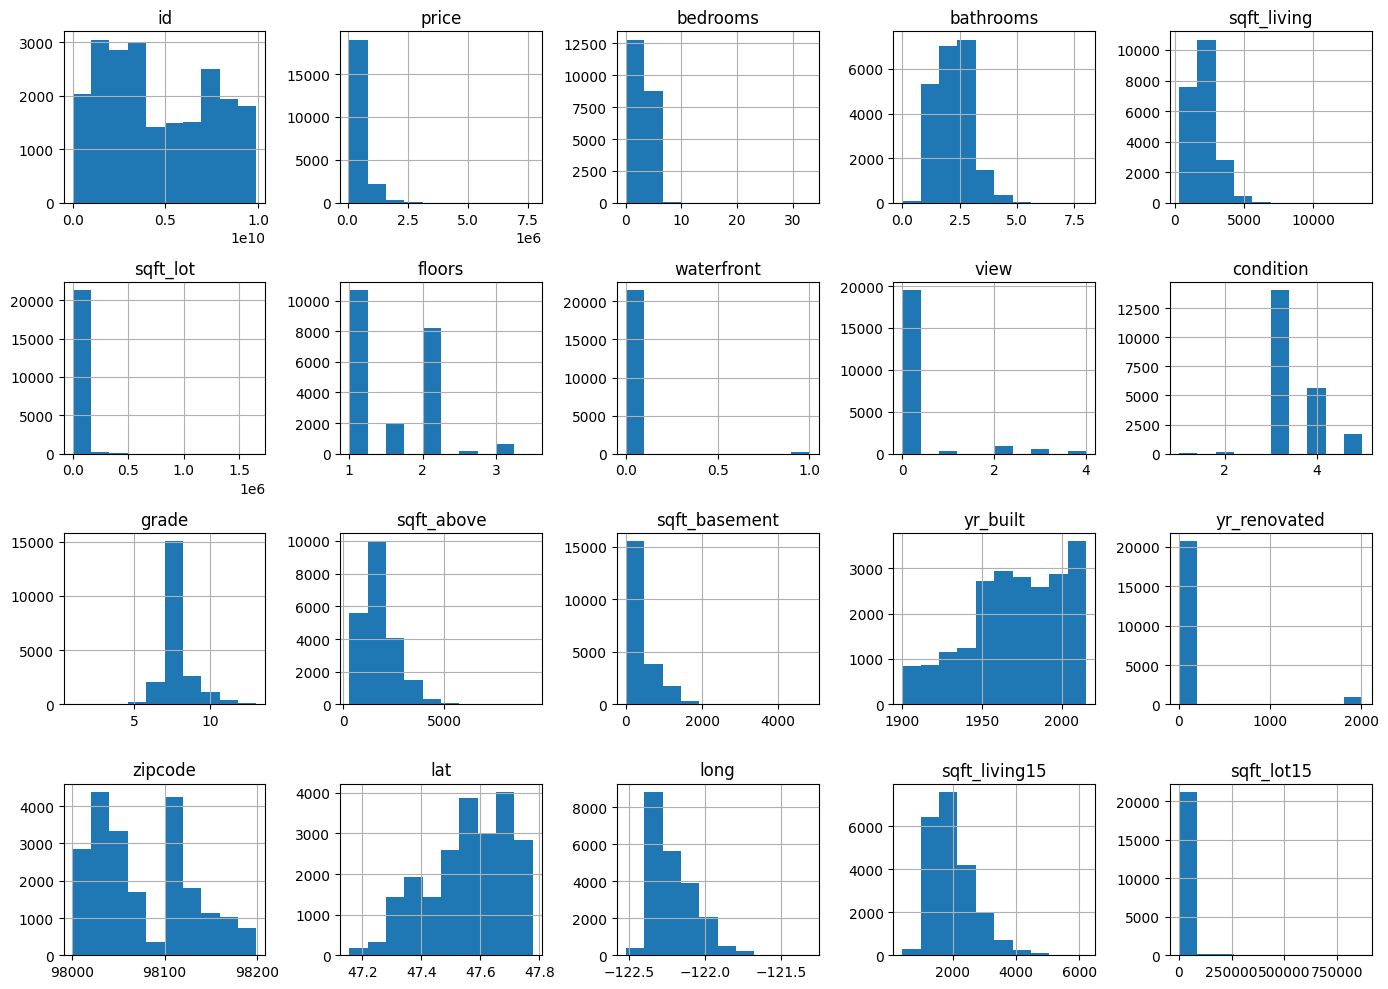

In [207]:
df.hist(figsize=(14,10),layout=(4, 5), sharex=False)
plt.tight_layout()
plt.show()

- almost all variables are not normally distributed, many have outliers.
- year-renovated seem to have a lot 0, this means that the house was never renovated.

In [131]:
num_rows = (df['yr_renovated'] == 0).sum()
num_rows

20699

Text(0.5, 1.0, 'Histogram of Year Renovated (excluding never renovated houses)\n')

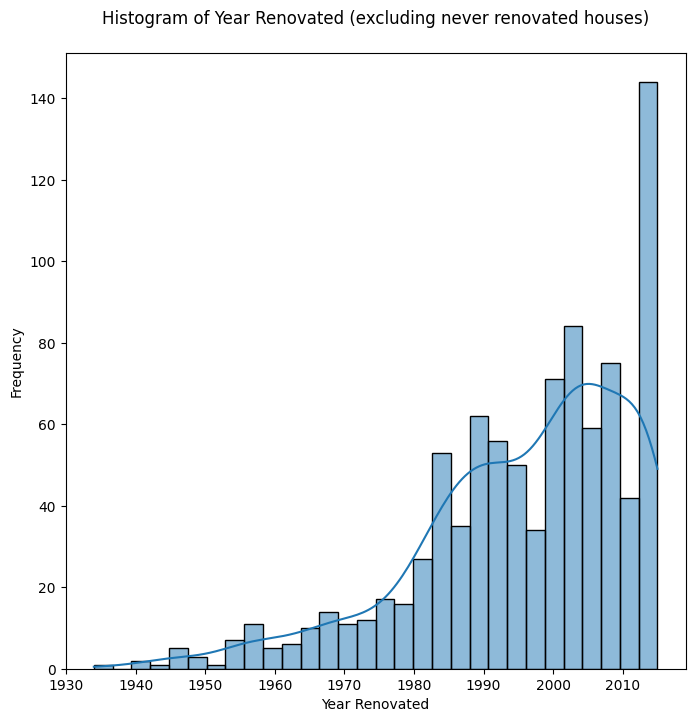

In [140]:
plt.figure(figsize=(8,8))
sns.histplot(data=df[df['yr_renovated'] != 0], x='yr_renovated', bins=30, kde=True)
plt.xlabel('Year Renovated')
plt.ylabel('Frequency')
plt.title('Histogram of Year Renovated (excluding never renovated houses)\n')

<AxesSubplot: xlabel='yr_renovated', ylabel='price'>

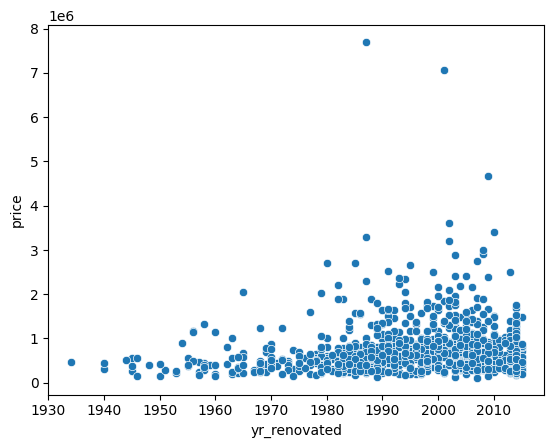

In [142]:
sns.scatterplot(data=df[df['yr_renovated'] != 0], x='yr_renovated', y='price')

<AxesSubplot: xlabel='sqft_lot15', ylabel='Count'>

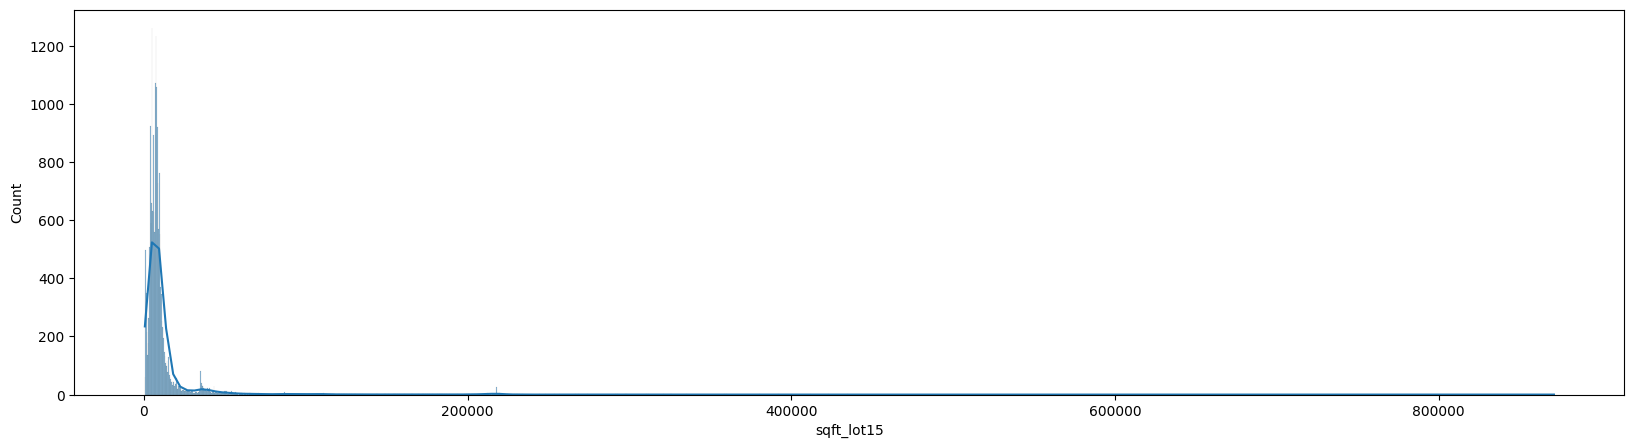

In [128]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='sqft_lot15', kde=True)

In [191]:
df['yr_mon'] = df['date'].str[:6]
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  yr_mon  
0        5650  201410  
1        7639  201412  
2        8062  201502  
3        5000  201412  
4        7503  201502  

[5 rows x 22 columns]

In [172]:
price_mean = df['price'].mean()

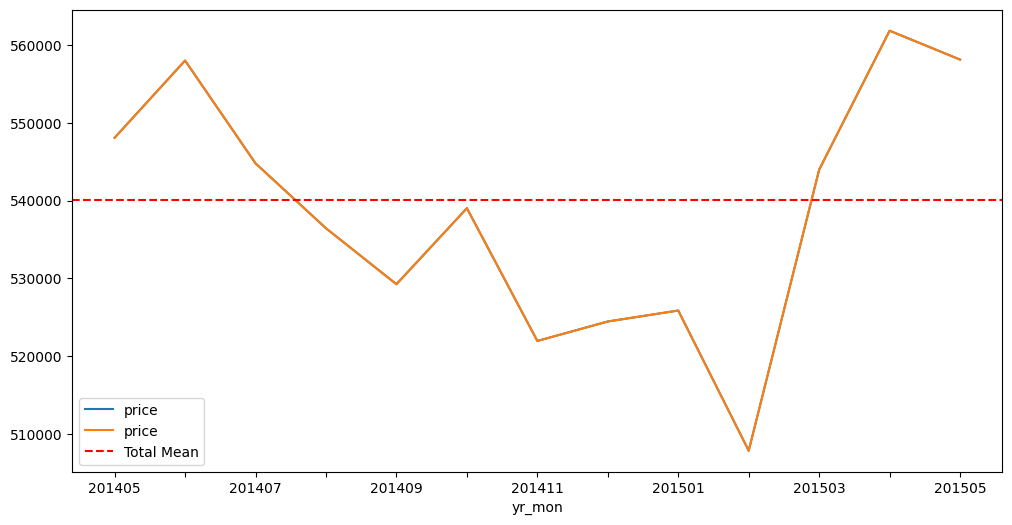

In [194]:
yr_mon_prices = df.groupby('yr_mon')['price'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
yr_mon_prices.plot(x='yr_mon', y='price', ax=ax)
yr_mon_prices.plot(ax=ax, label='Monthly Mean')
plt.axhline(y=price_mean, color='r', linestyle='--', label='Total Mean')
plt.xticks(range(len(yr_mon_prices.index)))
plt.legend()
plt.show()

#### Discrete Variables

In [121]:
df['bathrooms'].nunique() 

30

In [210]:
discrete_vars = []
continuous_vars = []

for col in df.columns:
    n_unique = df[col].nunique()  
    if n_unique <= 30:
        discrete_vars.append(col)
    else:
        continuous_vars.append(col)

print('Discrete variables:', discrete_vars)
print('Continuous variables:', continuous_vars)

Discrete variables: ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_mon']
Continuous variables: ['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [211]:
continuous_vars.remove('id')
continuous_vars.remove('date')
continuous_vars.remove('price')
continuous_vars.remove('zipcode')
print('Discrete variables:', discrete_vars)
print('Continuous variables:', continuous_vars)

Discrete variables: ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_mon']
Continuous variables: ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


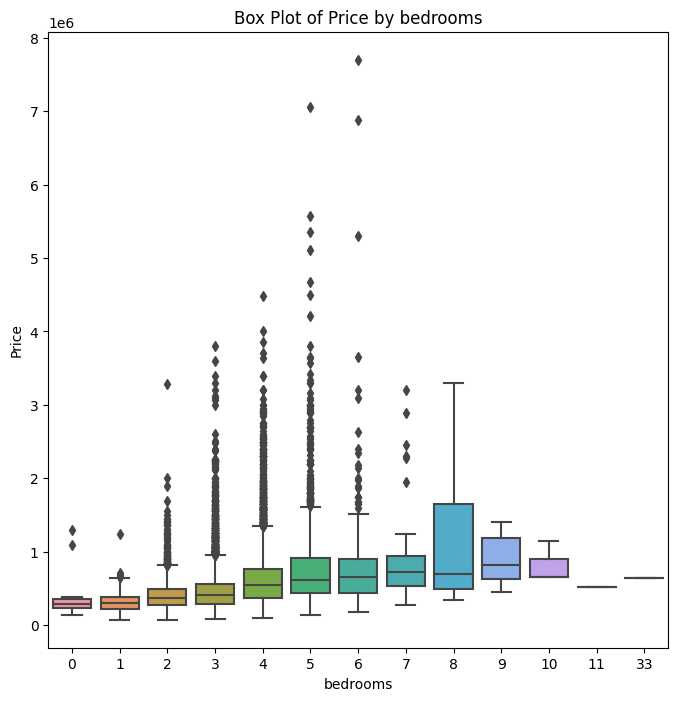

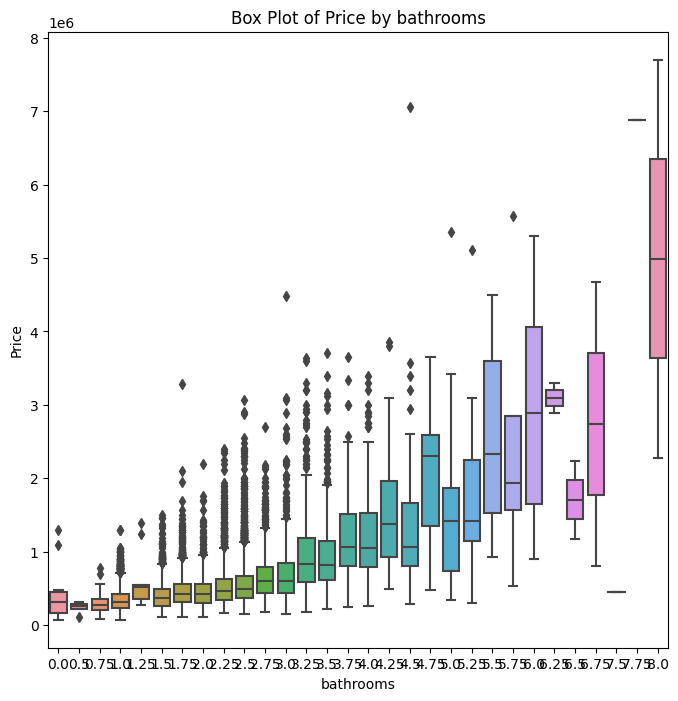

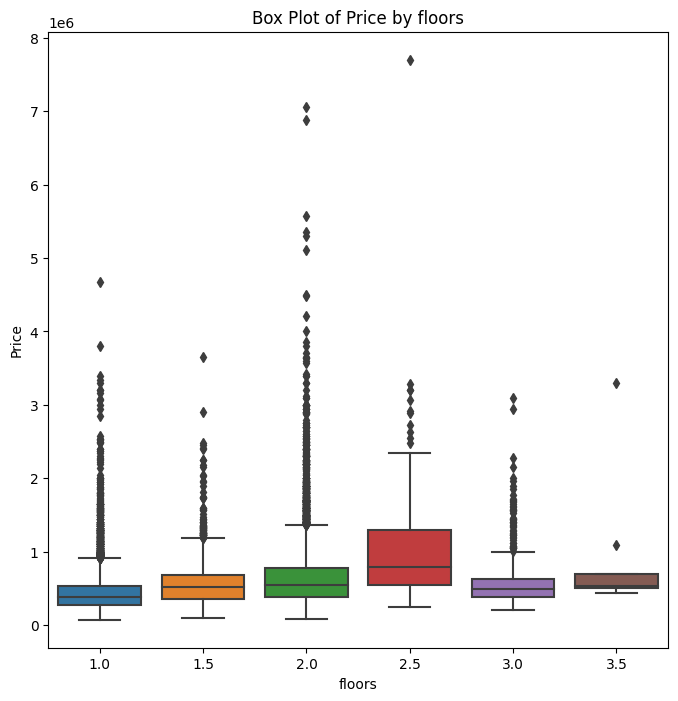

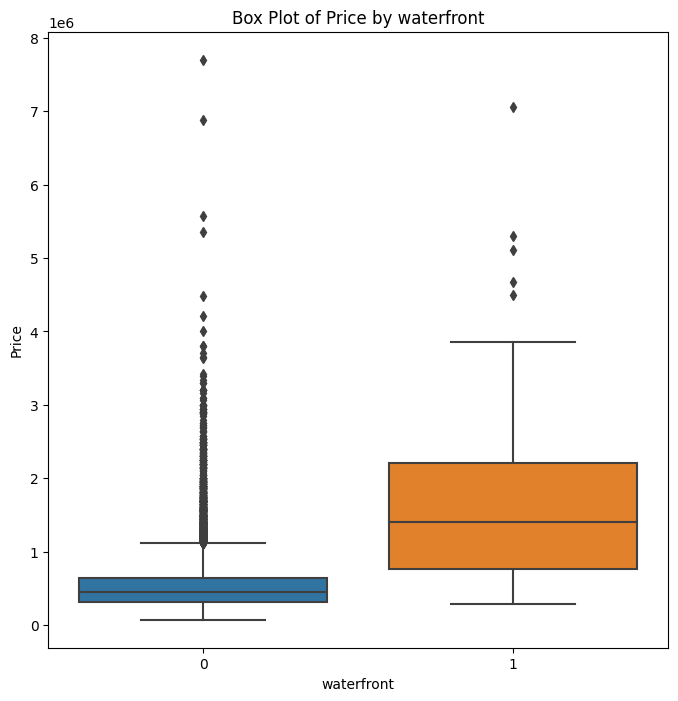

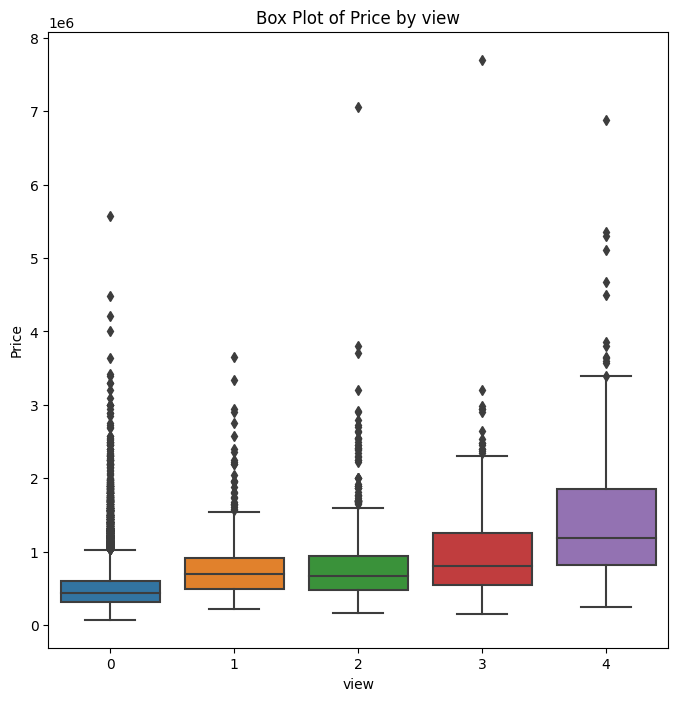

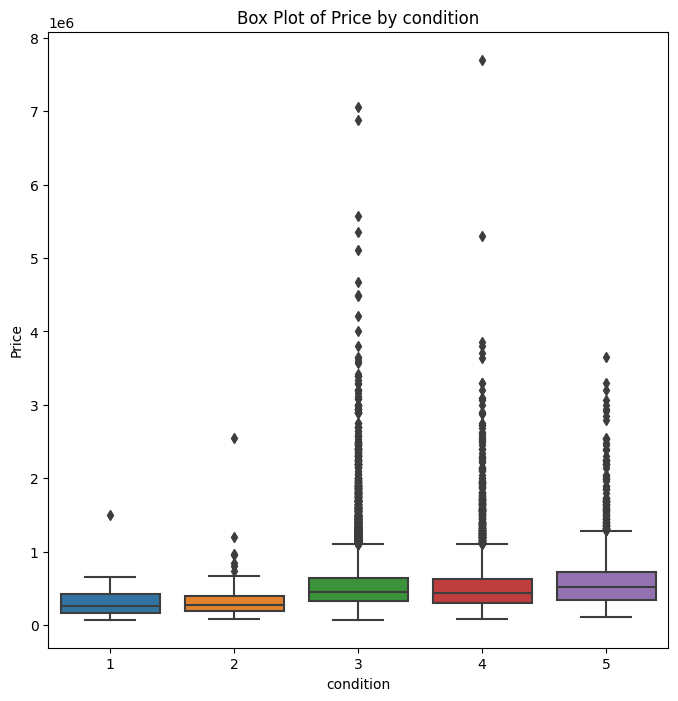

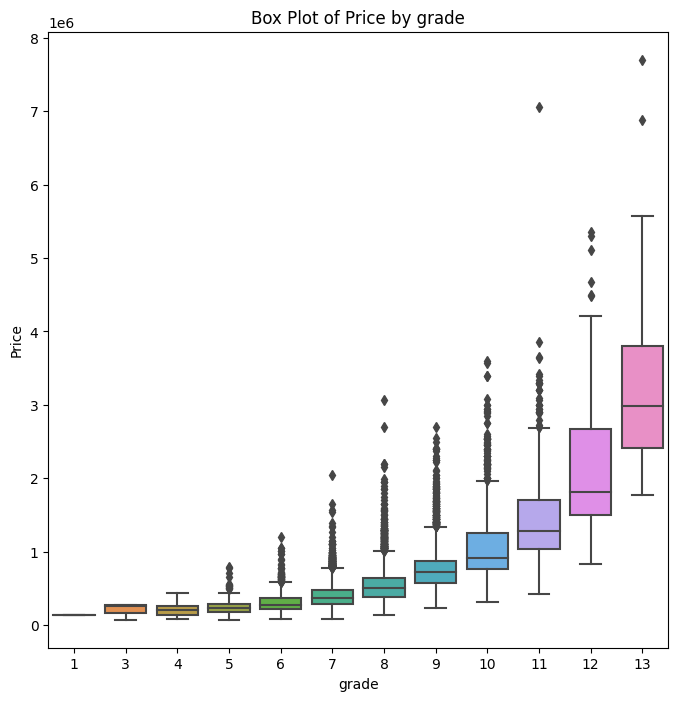

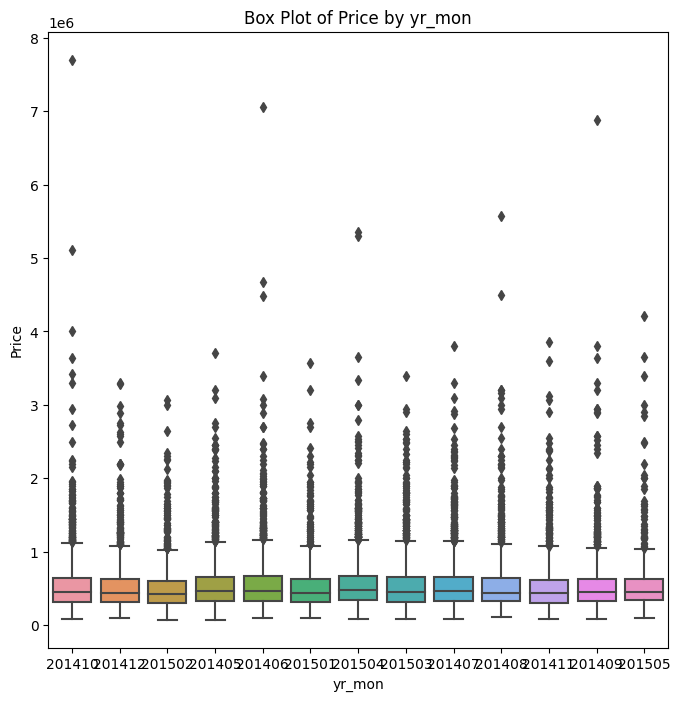

In [197]:
for col in discrete_vars:
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.boxplot(data=df, x=col, y='price', ax=ax)
    ax.set_title(f'Box Plot of Price by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    plt.show()

<AxesSubplot: xlabel='yr_mon', ylabel='price'>

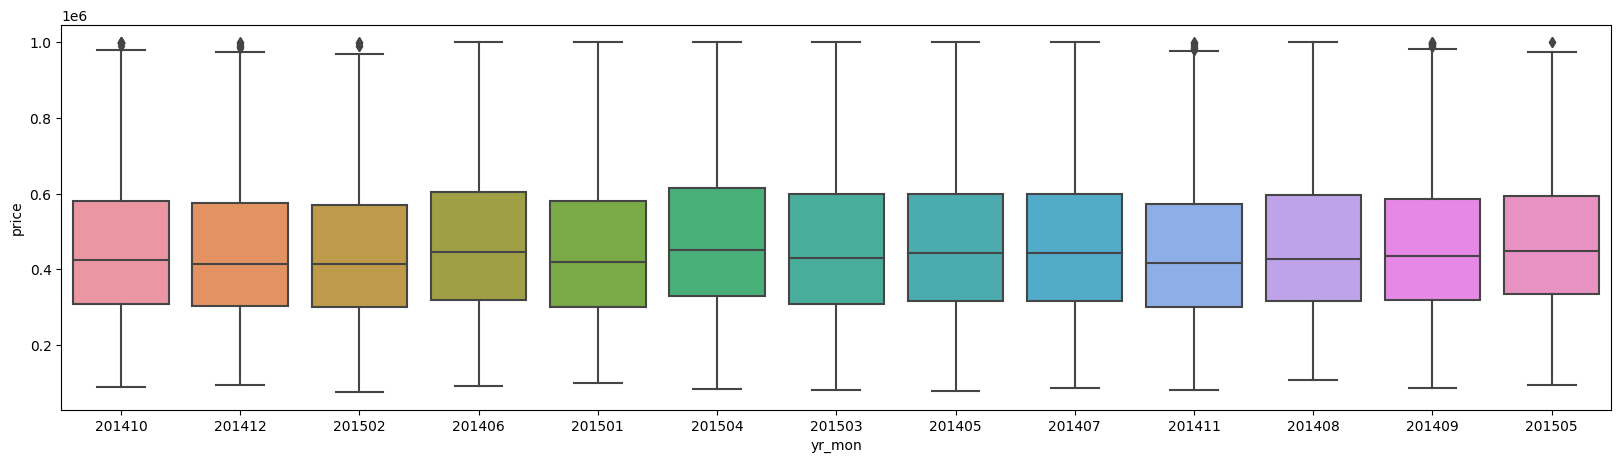

In [200]:
plt.figure(figsize=(20,5))
sns.boxplot(x='yr_mon', y='price', data=df[df['price'] <= 1000000])

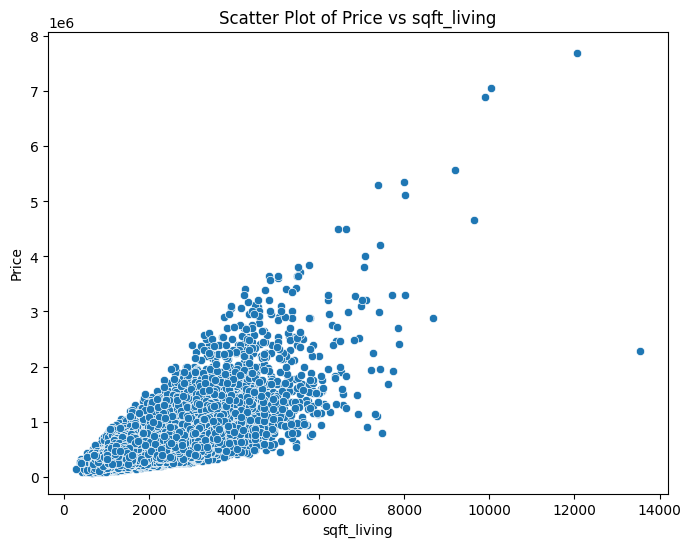

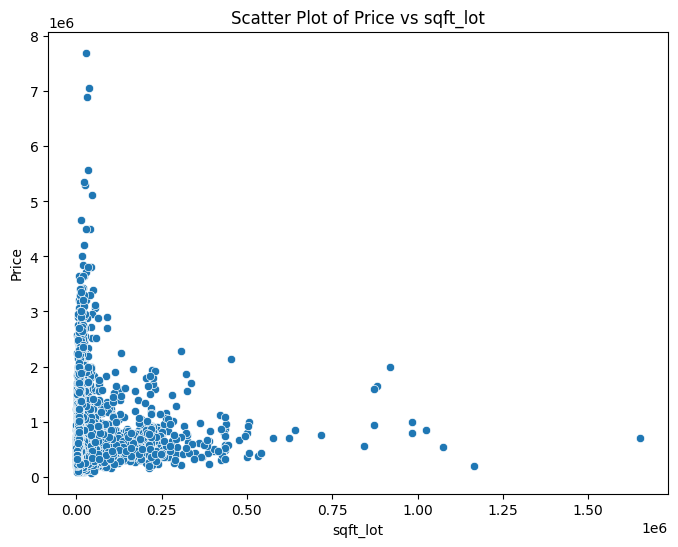

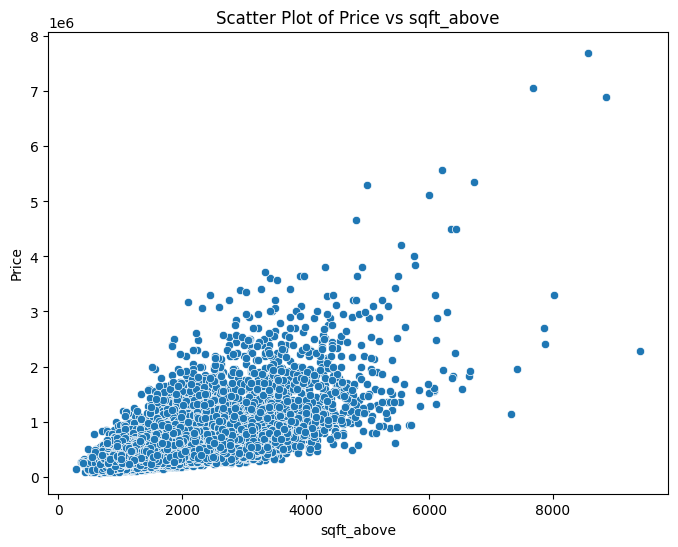

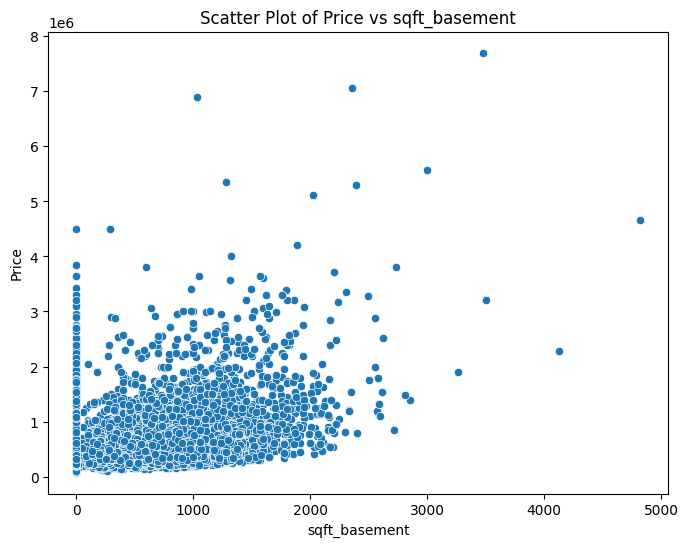

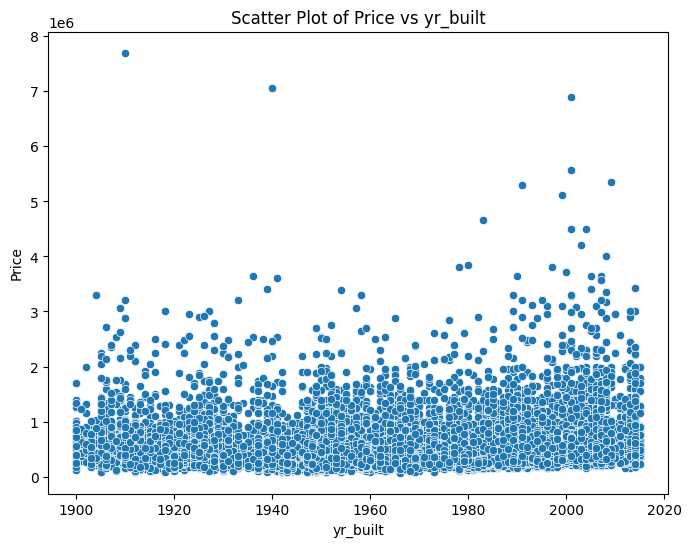

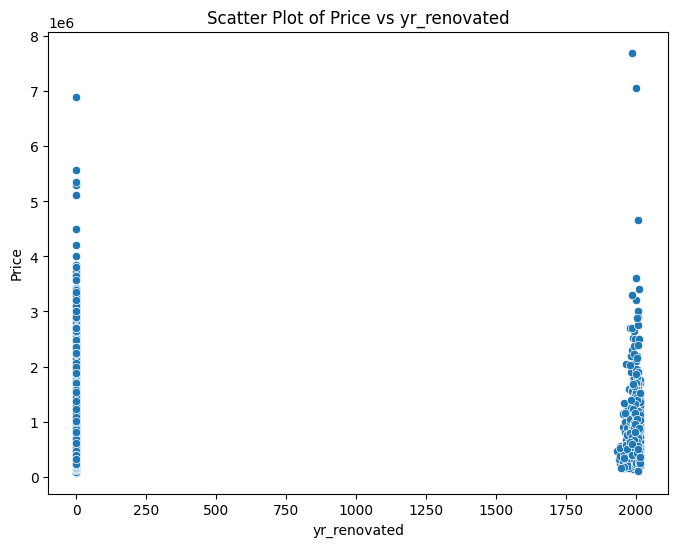

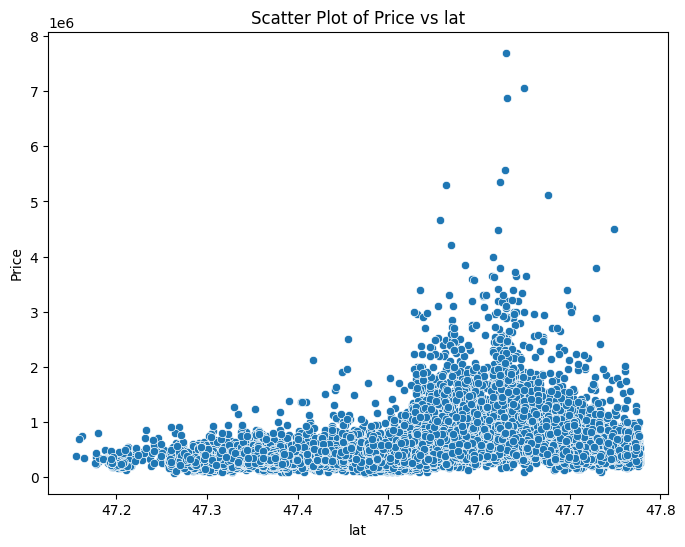

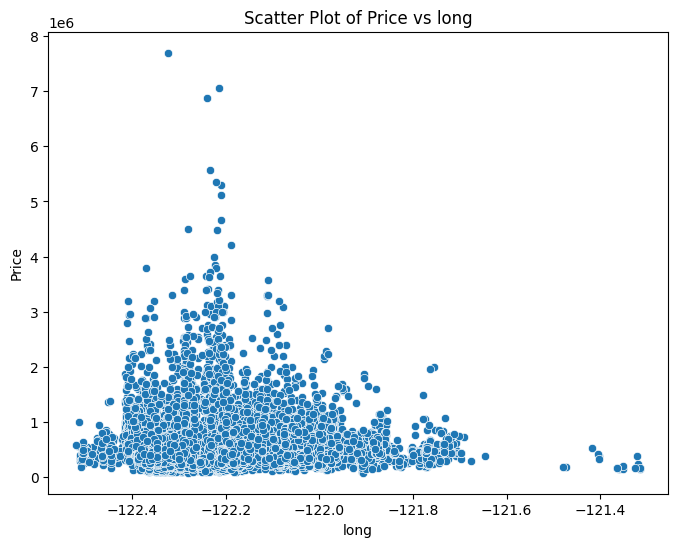

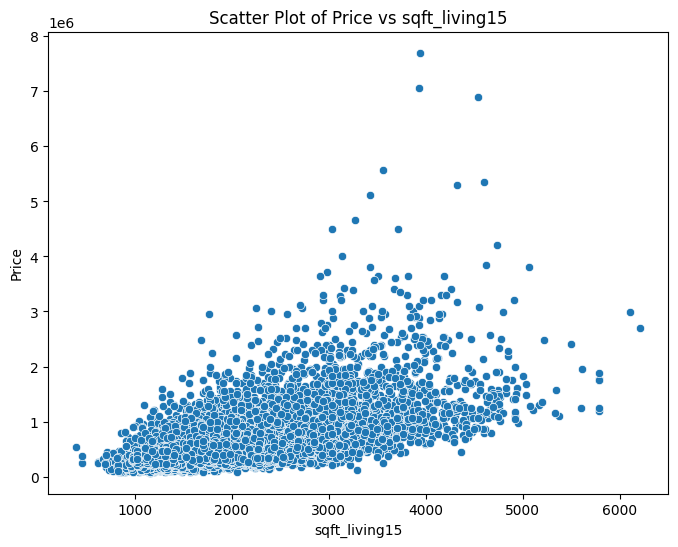

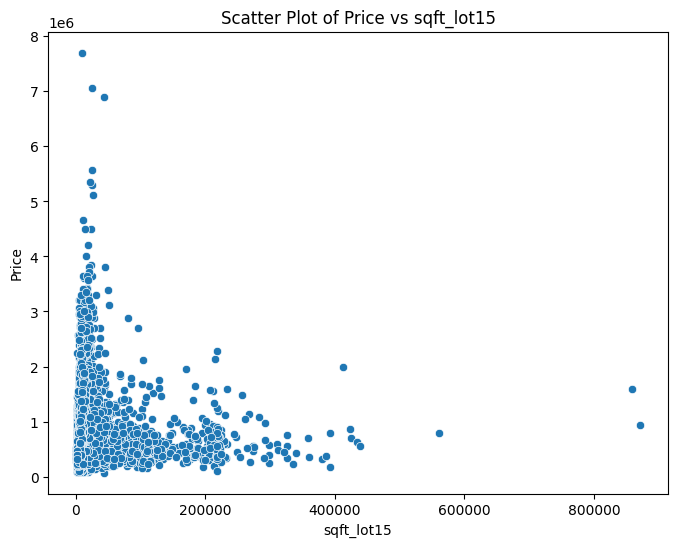

In [126]:
for col in continuous_vars:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='price', ax=ax)
    ax.set_title(f'Scatter Plot of Price vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    plt.show()

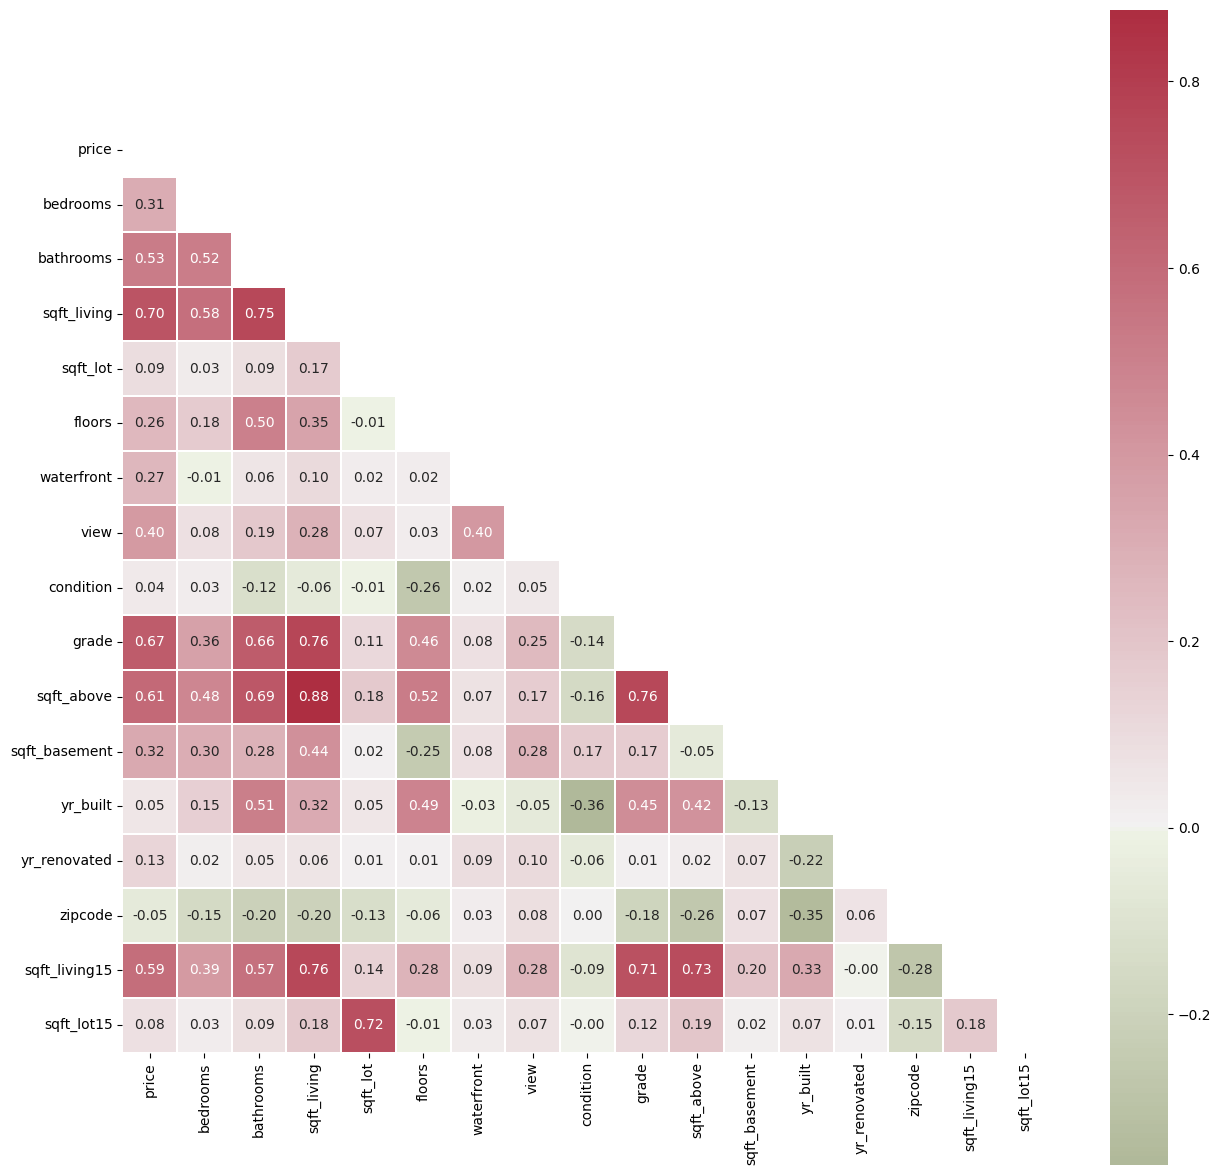

In [212]:
corr = df.drop(['id','date','lat','long'], axis = 1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, center=0, annot=True,fmt='.2f', square=True, cmap=cmap,linewidths=0.1)
plt.show()

### Price vs Location

In [105]:
mean_prices = df.groupby('zipcode').agg({'price':'mean', 'bedrooms':'median'}).round()
mean_prices

price  bedrooms
zipcode                     
98001     280805.0       3.0
98002     234284.0       3.0
98003     294111.0       3.0
98004    1355927.0       4.0
98005     810165.0       4.0
...            ...       ...
98177     676185.0       3.0
98178     310613.0       3.0
98188     289078.0       3.0
98198     302879.0       3.0
98199     791821.0       3.0

[70 rows x 2 columns]

Text(0.5, 1.0, 'Bar Plot of Price by Zipcode (Top 15)')

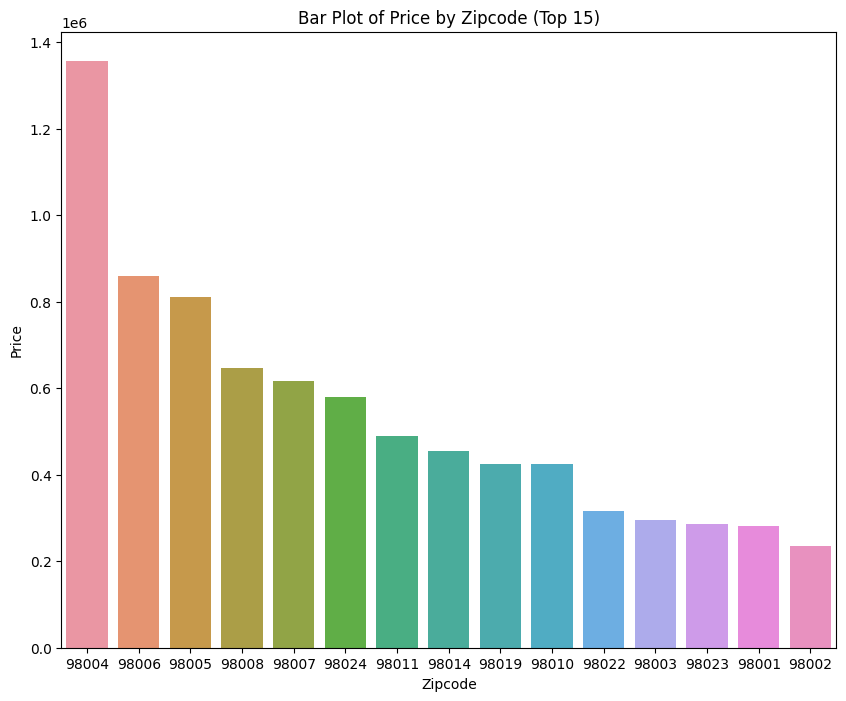

In [156]:
zip_prices = df.groupby('zipcode')['price'].mean().reset_index()
zip_price_sorted = zip_prices.head(15)
plt.figure(figsize=(10,8))
sns.barplot(data = zip_price_sorted, y = 'price', x = 'zipcode', order=zip_price_sorted.sort_values('price', ascending=False)['zipcode'])
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Bar Plot of Price by Zipcode (Top 15)')

There is a significant difference in the house price in term of location.

### Feature Engineering

In [70]:
fig = px.scatter(df, x='long', y='lat', color='price', color_continuous_scale='OrRd')

fig.update_layout(
    title='Price by Location',
    xaxis_title='Longitude',
    yaxis_title='Latitude'
)

The highest house price reached 7.7 million, and the number is continuous, so directly using the price variable in the data can't represent the geographical pattern of the house price distribution. 

<AxesSubplot: xlabel='price', ylabel='Count'>

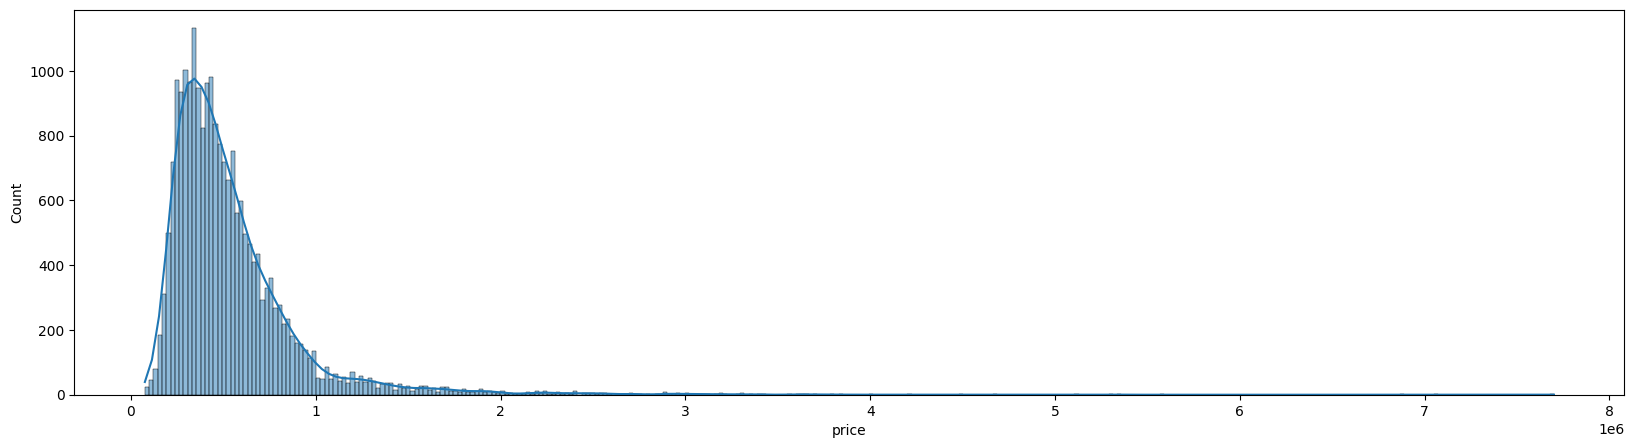

In [111]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='price', kde=True)

Based on the distribution, here we engineer a new variable **price_range** and set 5 ranges for the house price as below: 

In [109]:
df['price_level']=0
df.loc[df['price']<=300000,'price_level']=0
df.loc[(df['price']>300000)&(df['price']<=500000),'price_level']=1
df.loc[(df['price']>500000)&(df['price']<=800000),'price_level']=2
df.loc[(df['price']>800000)&(df['price']<=1000000),'price_level']=3
df.loc[df['price']>1000000,'price_level']=4
df['price_level'].value_counts()

1    7990
2    6108
0    4570
3    1480
4    1465
Name: price_level, dtype: int64

In [110]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  price_level  
0        5650            0  
1        7639            2  
2        8062            0  
3        5000            2  
4        7503            2  

[5 rows x 22 columns]

In [ ]:
fig = px.scatter(df, x='long', y='lat', color='price_level', color_continuous_scale='OrRd')

fig.update_layout(
    title='Price by Location',
    xaxis_title='Longitude',
    yaxis_title='Latitude'
)